In [18]:
import random
import numpy as np
from scipy.sparse import rand
import matplotlib.pyplot as plt
from sinkhornTransport import sinkhornTransport

In [19]:
np.random.seed(0)

In [49]:
#relevant dimensions 
d1 = 100
d2 = 10
N = 40


M = np.random.uniform(size = (d1, d2))
M = M/np.median(M)

#set lambda
lamb = 200

#matrix to be scaled
K=np.exp(-lamb*M)

U = K*M

a = rand(d1, N, density = 0.8).todense()
a = a @ np.linalg.pinv(np.atleast_2d(np.sum(a, axis = 0)))
a = np.array(a)

b = rand(d2,N,density = 0.8).todense()
b = b/np.sum(b, axis = 0)
b = np.array(b)

In [50]:
# import pandas as pd
# a = pd.read_csv('a.dat', sep=";", header=None).to_numpy()
# b = pd.read_csv('b.dat', sep=";", header=None).to_numpy()
# M = pd.read_csv('M.dat', sep=";", header=None).to_numpy()

In [51]:

# #set lambda
# lamb = 200

# #matrix to be scaled
# K=np.exp(-lamb*M)

# U = K*M


In [52]:
print('Computing ' + str(N) + ' distances from a to b_1, ... b_' + str(N))
# D,lowerEMD,l,m = sinkhornTransport(a,b,K,U,lamb, verbose = 1)
D,lowerEMD,l,m  = sinkhornTransport(a,b,K,U,lamb, verbose = 1)

Computing 40 distances from a to b_1, ... b_40
Iteration : 2  Criterion:  0.7609253719929763
Iteration : 22  Criterion:  0.5890048206250427
Iteration : 42  Criterion:  0.43696038929210923
Iteration : 62  Criterion:  0.3781406744443959
Iteration : 82  Criterion:  0.22208529655245293
Iteration : 102  Criterion:  0.15207783463506785
Iteration : 122  Criterion:  0.1184808251874789
Iteration : 142  Criterion:  0.11114046541645344
Iteration : 162  Criterion:  0.09553403593265115
Iteration : 182  Criterion:  0.08223539063804493
Iteration : 202  Criterion:  0.06353255988719246
Iteration : 222  Criterion:  0.05817783940118437
Iteration : 242  Criterion:  0.04979090284283172
Iteration : 262  Criterion:  0.039551837015071645
Iteration : 282  Criterion:  0.02834489320935489
Iteration : 302  Criterion:  0.028204616213972432
Iteration : 322  Criterion:  0.028014271989650633
Iteration : 342  Criterion:  0.027521277398029002
Iteration : 362  Criterion:  0.026224946406644252
Iteration : 382  Criterion:

Text(0.5, 1.0, 'Dual-Sinkhorn Divergence and Lower Bound on EMD for 1-vs-40 pairs')

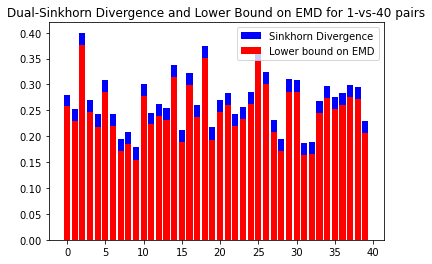

In [53]:
plt.bar(range(len(D)),D, color = 'b')
plt.bar(range(len(lowerEMD.reshape(-1))), lowerEMD.reshape(-1), color = 'r')
plt.legend(labels=['Sinkhorn Divergence','Lower bound on EMD'])
plt.title("Dual-Sinkhorn Divergence and Lower Bound on EMD for 1-vs-" + str(N) + " pairs")

In [54]:
D.shape

(40,)

Display (smoothed) optimal transport from a to b_29, which has been chosen randomly.


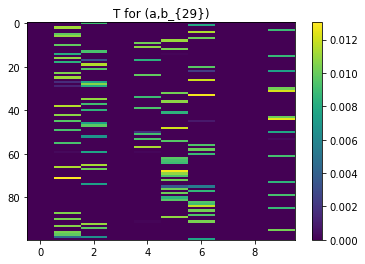

In [55]:

# choose a random histogram b_i. 
i= round(N*np.random.rand())
i= 29
print("Display (smoothed) optimal transport from a to b_"+str(i) + ', which has been chosen randomly.')
T = m[:,i:i+1].T * (l[:, i:i+1] * K)

plt.imshow(T, aspect='auto', interpolation='none')
plt.title("T for (a,b_{"+ str(i) +"})")
plt.colorbar()

In [56]:
# check that T is indeed a transport matrix.
temp1 = np.round(np.linalg.norm(np.sum(T, axis = 0) - b[:, i], 2), 4)
temp2 = np.round(np.linalg.norm(np.sum(T, axis = 1)-a.reshape(-1), 2), 4)
print("Deviation of T from marginals: " + str(temp1) +" "+ str(temp2) )

Deviation of T from marginals: 0.0 0.0


In [10]:
# Example with N times 1-vs-1 mode

print('***** Example when Computing N distances between N different pairs ******')
# a is now updated to be a matrix of column vectors in the simplex.
a = rand(d1, 1, density = 0.5).todense()
a = a/np.sum(a)
a = np.array(a)
print('Computing '+str(N)+' distances (a_1,b_1), ... a_'+str(N) +'b_'+str(N))
D,lowerEMD,l,m = sinkhornTransport(a,b,K,U,lamb, verbose = 1)

***** Example when Computing N distances between N different pairs ******
Computing 40 distances (a_1,b_1), ... a_40b_40
Iteration : 2  Criterion:  0.8526281238411788
Iteration : 22  Criterion:  0.49920578707916974
Iteration : 42  Criterion:  0.3854951577318586
Iteration : 62  Criterion:  0.29079820351707847
Iteration : 82  Criterion:  0.2907809942768291
Iteration : 102  Criterion:  0.23709057440892642
Iteration : 122  Criterion:  0.21653421795347827
Iteration : 142  Criterion:  0.15743433744058152
Iteration : 162  Criterion:  0.15321652737964753
Iteration : 182  Criterion:  0.14843014650547695
Iteration : 202  Criterion:  0.13807556954065972
Iteration : 222  Criterion:  0.12528128775458078
Iteration : 242  Criterion:  0.12402447504144071
Iteration : 262  Criterion:  0.12358663857529481
Iteration : 282  Criterion:  0.07290427079223219
Iteration : 302  Criterion:  0.07290419250693475
Iteration : 322  Criterion:  0.07290418441455676
Iteration : 342  Criterion:  0.07290416340458875
Iterat

Display Vector of Distances and Lower bounds on EMD


Text(0.5, 1.0, 'Dual-Sinkhorn Divergence and Lower Bound on EMD for 40 pairs (a_i,b_i)')

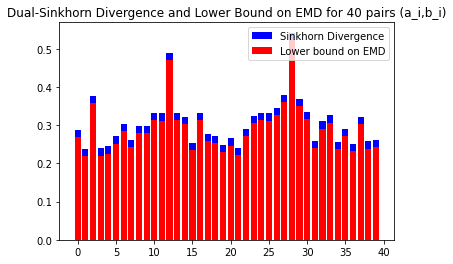

In [11]:
print("Display Vector of Distances and Lower bounds on EMD")
plt.bar(range(len(D)),D, color = 'b')
plt.bar(range(len(lowerEMD.reshape(-1))), lowerEMD.reshape(-1), color = 'r')
plt.legend(labels=['Sinkhorn Divergence','Lower bound on EMD'])
plt.title("Dual-Sinkhorn Divergence and Lower Bound on EMD for " + str(N) + " pairs (a_i,b_i)")

Display (smoothed) optimal transport from a to b_9, which has been chosen randomly.


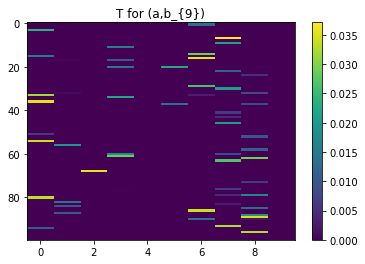

In [14]:
# choose a random histogram b_i. 
i= round(N*np.random.rand())
print("Display (smoothed) optimal transport from a to b_"+str(i) + ', which has been chosen randomly.')
T = m[:,i:i+1].T * (l[:, i:i+1] * K)

plt.imshow(T, aspect='auto', interpolation='none')
plt.title("T for (a,b_{"+ str(i) +"})")
plt.colorbar()

In [16]:
D

array([0.28775445, 0.23859033, 0.37646051, 0.23961942, 0.24454901,
       0.27062132, 0.30306662, 0.26105137, 0.29791022, 0.29765562,
       0.33193311, 0.33076354, 0.48909081, 0.3329618 , 0.3205113 ,
       0.25455228, 0.33274184, 0.27779144, 0.27279709, 0.24932939,
       0.26615998, 0.24009844, 0.29054119, 0.32452777, 0.33255063,
       0.33130198, 0.34457213, 0.37869654, 0.54218429, 0.36908877,
       0.3350804 , 0.2594729 , 0.31041487, 0.32544476, 0.25734482,
       0.29048074, 0.25084265, 0.32184206, 0.25798578, 0.2618343 ])

In [17]:
D.shape

(40,)